**Mixalis Nikitaras**  
# Computational Dynamics, Astrodynamics and Applications
## Exercise 2
### Task 2

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from scipy.integrate import simpson
import math as m

# Function Definitions

In [2]:
#This function computes the height of the satellite
def H(r):
    r_earth=6371
    return r-r_earth

In [3]:
#This function computes the density of Earth's atmosphere in kg/m^3 for each height h in km
def rho(h):
    if h<15:
        r_0=0.1
    else:
        r_0=(0.1*h)**(-7.5)
    return r_0

In [4]:
#Define System of Differential Equations
def rhs_2bp_pert(t,X):
    x,y,vx,vy=X
    mu=398600.433
    S=8000
    m_sat=400000
    r=np.sqrt(x**2+y**2)
    r3=r*r*r
    v=np.sqrt(vx**2+vy**2)
    x_dot=vx
    y_dot=vy
    px=-1000*(rho(H(r))*v*x_dot*(1.5*S/(2*m_sat)))
    py=-1000*(rho(H(r))*v*y_dot*(1.5*S/(2*m_sat)))
    vx_dot=-mu*x/r3 + px
    vy_dot=-mu*y/r3 + py
    
    return [x_dot,y_dot,vx_dot,vy_dot]

In [5]:
#Define integration stop. The differential equations are integrated until the satellite's height (r-r_earth) reaches zero.
def stop(t,X):
    x,y,vx,vy=X
    r_earth=6371
    return np.sqrt(x**2+y**2)-r_earth

stop.terminal = True

In [23]:
t0=0
rearth=6371 #Earth Radius in km
mu=398600.433 #Earth's mu in km^3/s^2
H1=400 #Satellite's initial height in km
x0=0 #Satellite's initial x position in km
y0=rearth+H1 #Satellite's initial y position in km
r0=np.sqrt(x0**2 + y0**2) #Initial orbit radius
vc=np.sqrt(mu/r0) #Initial speed of satellite
vx0=-vc
vy0=0
T=2*np.pi/vc*(rearth+H1) #Orbital period of satellite
tmax=8000*T
ICCAR=[x0,y0,vx0,vy0] #Initial conditions in cartesian coordinates

In [24]:
sol=solve_ivp(rhs_2bp_pert,[0,tmax],ICCAR,t_eval=np.linspace(0,tmax,20*8000),events=stop,method='DOP853',atol=1e-12,rtol=1e-12)

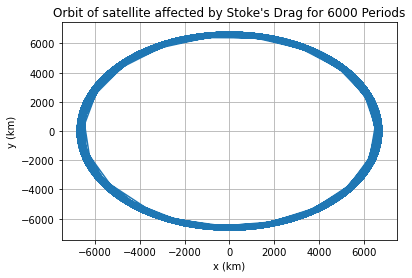

In [25]:
# Figure 0 Settings
plt.figure(0)
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.grid()
plt.title('Orbit of satellite affected by Stoke\'s Drag for 6000 Periods')

plt.plot(sol.y[0],sol.y[1])


### Gauss Equations

In [26]:
H1=np.linspace(400,15,1000) 
H2=np.linspace(15,0,1000) 

m=400000 #kg
R_e=6371 #km
S=8*10**(-3) #km^2
mu=398600.433 #km^3/s^2
const=1.5*S/m 
def func1(x):
    res=-1/(np.sqrt(mu*(x+R_e))*10**9*(0.1*x)**(-7.5))
    return res
def func2(x):
    res=-1/(np.sqrt(mu*(x+R_e))*(0.1*10**9))
    return res

y1=func1(H1)    
I1=simpson(y1,H1,dx=0.001)

y2=func2(H2)    
I2=simpson(y2,H2,dx=0.001)

t=I1/const + I2/const
error_1=(-t+sol.t[-1])/t
print("Time needed for the satellite to fall to Earth\'s surface according to Gauss Equations: ",np.round(t,8),"seconds")
print("Time needed for the satellite to fall to Earth\'s surface according to the simulation: ",sol.t[-1],"seconds")
print("Relative Error : ",error_1*100,"%")

Time needed for the satellite to fall to Earth's surface according to Gauss Equations:  31385872.05727548 seconds
Time needed for the satellite to fall to Earth's surface according to the simulation:  31387680.51854152 seconds
Relative Error :  0.005762023316543748 %


### Conclusions
In this script our goal is to numerically integrate the differential equations of a satellite in cartesian coordinates  
The system is considered pertrubed from Stoke's drag.  
The integration time span is 6000 orbital periods.  
The orbit of the satellite is plotted in the figure above. As we see, the orbital radius progressively decreases.  
We compute the time needed for the satellite to impact the earth's surface due to the pertubative force of Stoke's drag.  
Next, we calculate the theoretical time according to the prediction from Gauss Equations.  
We find that the simulation time coincides with the theoretical time.